In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
from random import shuffle
from collections import Counter
%matplotlib inline

In [2]:
DIR = "TrainingData/RAW"
TAR = "TrainingData/model"
print(os.environ.get('QT_API'))

None


In [3]:
W = [1, 0, 0, 0, 0, 0, 0, 0, 0]
S = [0, 1, 0, 0, 0, 0, 0, 0, 0]
A = [0, 0, 1, 0, 0, 0, 0, 0, 0]
D = [0, 0, 0, 1, 0, 0, 0, 0, 0]
WA = [0, 0, 0, 0, 1, 0, 0, 0, 0]
WD = [0, 0, 0, 0, 0, 1, 0, 0, 0]
SA = [0, 0, 0, 0, 0, 0, 1, 0, 0]
SD = [0, 0, 0, 0, 0, 0, 0, 1, 0]
NK = [0, 0, 0, 0, 0, 0, 0, 0, 1]

classes = ['W', 'S', 'A', 'D', 'WA', 'WD', 'SA', 'SD', 'NK']

GLOBAL_COUNTER = {
   'W': 0,
    'S': 0,
    'A': 0,
    'D': 0,
    'WA': 0,
    'WD': 0,
    'SA': 0,
    'SD': 0,
    'NK': 0,
}


In [4]:
def get_key(val): 
    return classes[np.argmax(val)] 

In [5]:
get_key([0, 0, 0, 1, 0, 0, 0, 0, 0])

'D'

In [27]:
def analyze():
    DIR = "TrainingData/SHUFFLED-460k-15%W"
    GLOBAL_COUNTER = {
        'W': 0,
        'S': 0,
        'A': 0,
        'D': 0,
        'WA': 0,
        'WD': 0,
        'SA': 0,
        'SD': 0,
        'NK': 0,
    }
    all_files = []
    for i in range(2):
        vals = []
        LOCAL_COUNTER = {
           'W': 0,
            'S': 0,
            'A': 0,
            'D': 0,
            'WA': 0,
            'WD': 0,
            'SA': 0,
            'SD': 0,
            'NK': 0,
        }
        

        print(os.path.join(DIR, f"CAR_160x120_{i}.npy"))
        data = np.load(os.path.join(DIR, f"CAR_160x120_{i}.npy"), allow_pickle=True)
        
        for d in data:
            LOCAL_COUNTER[get_key(d[1])] += 1
            GLOBAL_COUNTER[get_key(d[1])] += 1
            
        all_files.append(LOCAL_COUNTER)
     

        
    print("GLOBAL: ", GLOBAL_COUNTER)
    print(all_files)
    plt.clf()
    plt.bar(range(len(GLOBAL_COUNTER)), list(GLOBAL_COUNTER.values()), align='center')
    plt.xticks(range(len(GLOBAL_COUNTER)), list(GLOBAL_COUNTER.keys()))
    plt.show()
    
    W = []
    S = []
    A = []
    D = []
    WA = []
    WD = []
    SA = []
    SD = []
    NK = []
    
    for data in all_files:
        W.append(data['W'])
        WA.append(data['WA'])
        WD.append(data['WD'])
        S.append(data['S'])
        SA.append(data['SA'])
        SD.append(data['SD'])
        A.append(data['A'])
        D.append(data['D'])
        NK.append(data['NK'])

        
    plt.plot(W)
    plt.plot(S)
    plt.plot(A)
    plt.plot(D)
    plt.plot(WA)
    plt.plot(WD)
    plt.plot(SA)
    plt.plot(SD)
    plt.plot(NK)
    plt.show()
    
        

TrainingData/SHUFFLED-460k-15%W\CAR_160x120_0.npy
TrainingData/SHUFFLED-460k-15%W\CAR_160x120_1.npy
GLOBAL:  {'W': 4802, 'S': 412, 'A': 478, 'D': 239, 'WA': 3556, 'WD': 3878, 'SA': 365, 'SD': 45, 'NK': 438}
[{'W': 2401, 'S': 371, 'A': 457, 'D': 189, 'WA': 1955, 'WD': 1514, 'SA': 171, 'SD': 41, 'NK': 355}, {'W': 2401, 'S': 41, 'A': 21, 'D': 50, 'WA': 1601, 'WD': 2364, 'SA': 194, 'SD': 4, 'NK': 83}]


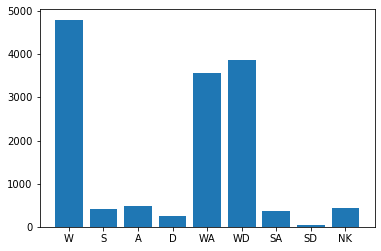

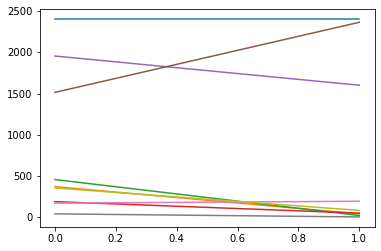

In [28]:
analyze()

In [ ]:
def BalanceEachFile(DIR):
    
    MAX_W = 2560
    GLOBAL = {
    'W': 0,
    'S': 0,
    'A': 0,
    'D': 0,
    'WA': 0,
    'WD': 0,
    'SA': 0,
    'SD': 0,
    'NK': 0,
    }
    GLOBAL_TOTAL = 0

    for f in os.listdir(DIR):
        w_count = 0
        file_total = 0
        file_name = os.path.join(DIR, f)
        key_counter = {
        'W': 0,
        'S': 0,
        'A': 0,
        'D': 0,
        'WA': 0,
        'WD': 0,
        'SA': 0,
        'SD': 0,
        'NK': 0,
        }

        print("------------------------------------------------------")
        print(file_name)
        data = np.load(file_name, allow_pickle=True)
        shuffle(data)
        new_data = []

        for i in range(16000):
            if data[i][1] == W:
                if w_count < MAX_W:
                    w_count += 1
                    new_data.append(data[i])
                    GLOBAL[get_key(data[i][1])] += 1
                    key_counter[get_key(data[i][1])] += 1
                    file_total += 1
            else:
                new_data.append(data[i])
                GLOBAL[get_key(data[i][1])] += 1
                key_counter[get_key(data[i][1])] += 1
                file_total += 1
        
        GLOBAL_TOTAL += file_total

        print("FILE:", key_counter)  
        print("FILE TOTAL:", file_total)
        np.save(os.path.join(TAR, f), new_data)
        
        print("------------------------------------------------------")




    print("GLOBAL:", GLOBAL)
    print("GLOBAL TOTAL:", GLOBAL_TOTAL)

In [ ]:
BalanceEachFile(DIR)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 6*np.pi, 100)
y = np.sin(x)

# You probably won't need this if you're embedding things in a tkinter plot...
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'r-') # Returns a tuple of line objects, thus the comma

for phase in np.linspace(0, 10*np.pi, 500):
    line1.set_ydata(np.sin(x + phase))
    fig.canvas.draw()
    fig.canvas.flush_events()